<a href="https://colab.research.google.com/github/selim-ahmed/Dataset-Analysis-with-Iris-Dataset/blob/main/Iris_Dataset_Analysis_Selim_Ahmed(2321668).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Modules

In [10]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

Loading the dataset

In [11]:
ds = pd.read_csv('https://raw.githubusercontent.com/selim-ahmed/Dataset-Analysis-with-Iris-Dataset/main/Iris.csv')
# ds = Data Set
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# to display status about data
ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Basic info about datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# To display no. of samples on each class
ds['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Preprocessing the dataset

In [15]:
# check for null values
ds.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

1. Discard **fourth** dimension (Petal Width) 

In [17]:
ds.drop(['petal_width'], axis = 1)

,sepal_length,sepal_width,petal_length,Species
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica


2.	Plot the data points using the first three dimensions (Sepal Length,  Sepal Width, and Petal Length) in 3d plots. Use three different shapes (triangle, square, circle) to plot data points for three different classes. You should use the class information from class label and use them when you decide on shapes. For shape you need only the class information.

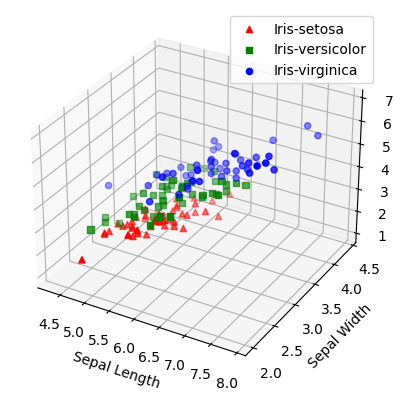

In [18]:
# Define 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data[:, :3]  # Select only the first three dimensions
target = iris.target  # Class labels

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the shape and color for each class
shapes = ['^', 's', 'o']
colors = ['r', 'g', 'b']
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Plot the data points for each class
for i in range(3):
    class_data = data[target == i]
    ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], marker=shapes[i], c=colors[i], label=labels[i])

# Set labels and legend
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()

# Show the plot
plt.show()


3.	Calculate the mean data point for each class and show them with similar shape with the larger size. For shape you need only the class information.

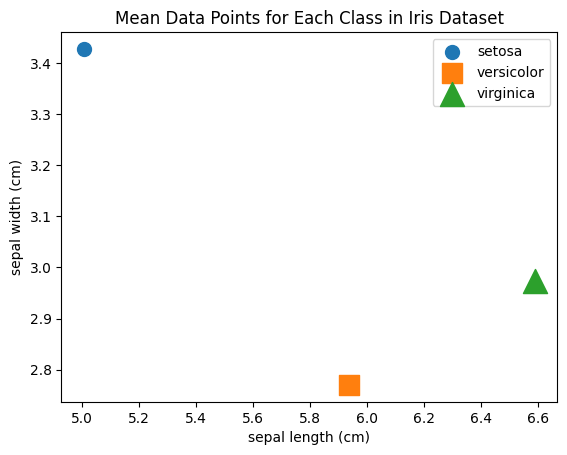

In [19]:
# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Step 2: Separate the dataset into different classes
class_data = {}
for i in range(len(labels)):
    label = labels[i]
    if label not in class_data:
        class_data[label] = []
    class_data[label].append(data[i])

# Step 3: Calculate the mean for each class separately
class_means = {}
for label, class_samples in class_data.items():
    class_means[label] = np.mean(class_samples, axis=0)

# Step 4: Visualize the mean data points
shapes = ['o', 's', '^']  # Shape symbols for different classes
sizes = [100, 200, 300]  # Sizes for different classes

for label, mean in class_means.items():
    plt.scatter(mean[0], mean[1], marker=shapes[label], s=sizes[label], label=iris.target_names[label])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title("Mean Data Points for Each Class in Iris Dataset")
plt.show()

4.	Plot histogram for each of the two  dimensions (Sepal Length,  Sepal Width). One plot for each dimension.

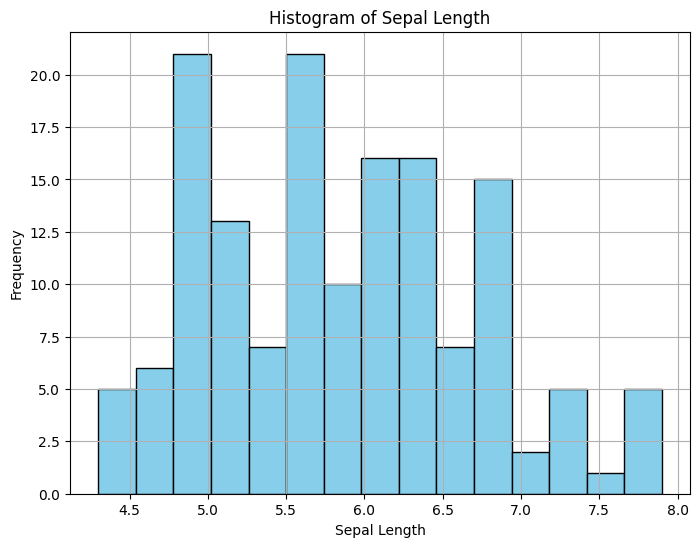

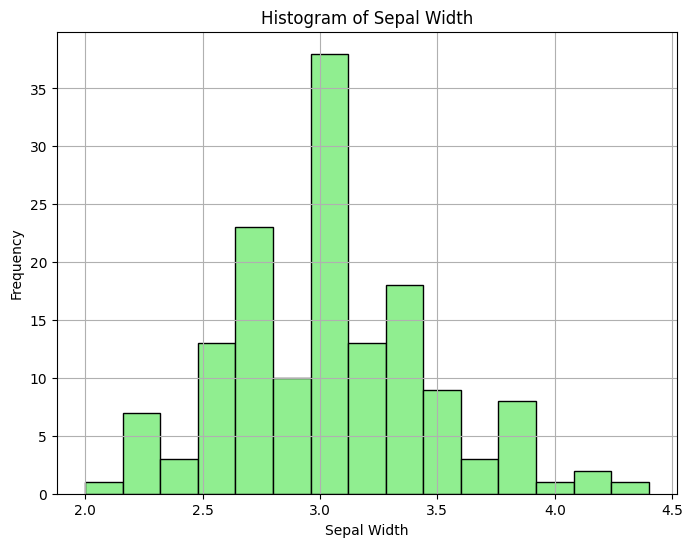

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv('https://raw.githubusercontent.com/selim-ahmed/Dataset-Analysis-with-Iris-Dataset/main/Iris.csv')

# Plot histogram for Sepal Length
plt.figure(figsize=(8, 6))
plt.hist(iris_df['sepal_length'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.grid(True)
plt.show()

# Plot histogram for Sepal Width
plt.figure(figsize=(8, 6))
plt.hist(iris_df['sepal_width'], bins=15, color='lightgreen', edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.grid(True)
plt.show()



5.	Calculate standard deviation (sigma) for each of the two  dimensions (Sepal Length,  Sepal Width). You can use library function to calculate standard deviation.